# Tips Dataset - Comprehensive Regression Analysis

This notebook analyzes the Tips dataset from Seaborn using various regression algorithms to predict tip amounts.

## Dataset Overview
- **Target**: Tip amount (continuous variable)
- **Features**: Total bill, sex, smoker, day, time, size
- **Samples**: 244 restaurant transactions
- **Type**: Business/Service industry data

## Business Context
Predicting tip amounts can help:
- Restaurant revenue forecasting
- Staff scheduling optimization
- Customer behavior analysis
- Service quality assessment

## Models to Compare:
1. Linear Regression
2. Ridge Regression
3. Lasso Regression
4. Decision Tree Regressor (DTR)
5. Random Forest Regressor (RFR)
6. Support Vector Regressor (SVR)
7. Gradient Boosting Regressor
8. XGBoost Regressor
9. LightGBM Regressor
10. Polynomial Regression


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
# import xgboost as xgb
# import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


In [2]:
# Load the Tips dataset
df = sns.load_dataset('tips')

print("Dataset Info:")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\nDataset description:")
print(df.info())

print("\nFirst few rows:")
df.head()


Dataset Info:
Shape: (244, 7)
Columns: ['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']

Dataset description:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None

First few rows:


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
# Exploratory Data Analysis
print("Dataset Statistics:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nUnique values in categorical columns:")
categorical_cols = ['sex', 'smoker', 'day', 'time']
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")

print(f"\nTarget variable (tip) statistics:")
print(f"Range: ${df['tip'].min():.2f} - ${df['tip'].max():.2f}")
print(f"Mean: ${df['tip'].mean():.2f}")
print(f"Median: ${df['tip'].median():.2f}")
print(f"Standard deviation: ${df['tip'].std():.2f}")


Dataset Statistics:
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000

Missing Values:
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

Unique values in categorical columns:
sex: ['Female', 'Male']
Categories (2, object): ['Male', 'Female']
smoker: ['No', 'Yes']
Categories (2, object): ['Yes', 'No']
day: ['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']
time: ['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

Target variable (tip) statistics:
Range: $1.00 - $10.00
Mean: $3.00
Median: $2.90
Standard deviation: $1.38


AttributeError: 'Axes' object has no attribute 'countplot'

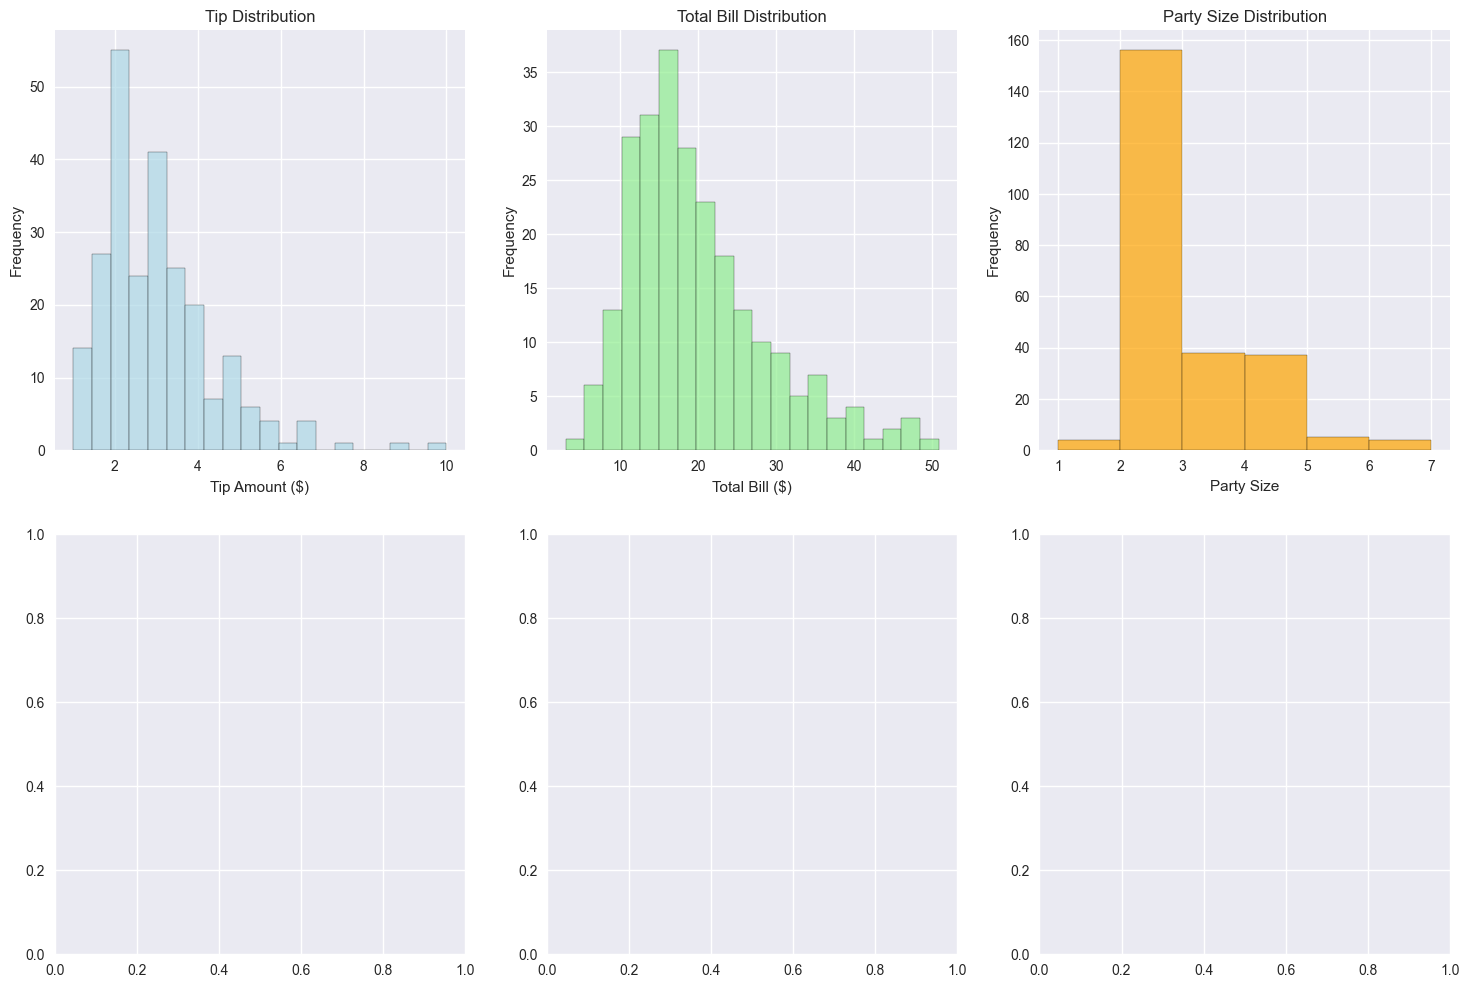

In [4]:
# Target and feature distributions
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Tip distribution
axes[0, 0].hist(df['tip'], bins=20, alpha=0.7, color='lightblue', edgecolor='black')
axes[0, 0].set_title('Tip Distribution')
axes[0, 0].set_xlabel('Tip Amount ($)')
axes[0, 0].set_ylabel('Frequency')

# Total bill distribution
axes[0, 1].hist(df['total_bill'], bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Total Bill Distribution')
axes[0, 1].set_xlabel('Total Bill ($)')
axes[0, 1].set_ylabel('Frequency')

# Size distribution
axes[0, 2].hist(df['size'], bins=range(1, 8), alpha=0.7, color='orange', edgecolor='black')
axes[0, 2].set_title('Party Size Distribution')
axes[0, 2].set_xlabel('Party Size')
axes[0, 2].set_ylabel('Frequency')

# Categorical variables
axes[1, 0].countplot(data=df, x='sex', ax=axes[1, 0])
axes[1, 0].set_title('Gender Distribution')

axes[1, 1].countplot(data=df, x='day', ax=axes[1, 1])
axes[1, 1].set_title('Day Distribution')
axes[1, 1].tick_params(axis='x', rotation=45)

axes[1, 2].countplot(data=df, x='time', ax=axes[1, 2])
axes[1, 2].set_title('Time Distribution')

plt.tight_layout()
plt.show()


In [ ]:
# Relationship analysis
plt.figure(figsize=(16, 10))

# Tip vs Total Bill
plt.subplot(2, 3, 1)
plt.scatter(df['total_bill'], df['tip'], alpha=0.6)
plt.xlabel('Total Bill ($)')
plt.ylabel('Tip ($)')
plt.title('Tip vs Total Bill')

# Tip by gender
plt.subplot(2, 3, 2)
sns.boxplot(data=df, x='sex', y='tip')
plt.title('Tips by Gender')

# Tip by day
plt.subplot(2, 3, 3)
sns.boxplot(data=df, x='day', y='tip')
plt.title('Tips by Day')
plt.xticks(rotation=45)

# Tip by time
plt.subplot(2, 3, 4)
sns.boxplot(data=df, x='time', y='tip')
plt.title('Tips by Time')

# Tip by party size
plt.subplot(2, 3, 5)
sns.boxplot(data=df, x='size', y='tip')
plt.title('Tips by Party Size')

# Tip by smoker
plt.subplot(2, 3, 6)
sns.boxplot(data=df, x='smoker', y='tip')
plt.title('Tips by Smoker Status')

plt.tight_layout()
plt.show()

# Calculate tip percentage
df['tip_percentage'] = (df['tip'] / df['total_bill']) * 100
print(f"\nTip percentage statistics:")
print(f"Mean: {df['tip_percentage'].mean():.2f}%")
print(f"Median: {df['tip_percentage'].median():.2f}%")
print(f"Range: {df['tip_percentage'].min():.2f}% - {df['tip_percentage'].max():.2f}%")


In [ ]:
# Data preprocessing for machine learning
df_ml = df.copy()

# Encode categorical variables
label_encoders = {}
categorical_cols = ['sex', 'smoker', 'day', 'time']

for col in categorical_cols:
    le = LabelEncoder()
    df_ml[col + '_encoded'] = le.fit_transform(df_ml[col])
    label_encoders[col] = le

# Prepare features and target
feature_columns = ['total_bill', 'size', 'sex_encoded', 'smoker_encoded', 'day_encoded', 'time_encoded']
X = df_ml[feature_columns]
y = df_ml['tip']

print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)
print("Features used:", feature_columns)

# Show encoding mappings
print("\nEncoding mappings:")
for col in categorical_cols:
    original_values = df[col].unique()
    encoded_values = df_ml[col + '_encoded'].unique()
    mapping = dict(zip(original_values, encoded_values))
    print(f"{col}: {mapping}")


In [ ]:
# Correlation analysis
plt.figure(figsize=(10, 8))
correlation_matrix = df_ml[feature_columns + ['tip']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, fmt='.3f')
plt.title('Correlation Matrix - Tips Dataset')
plt.tight_layout()
plt.show()

# Feature correlation with target
target_corr = correlation_matrix['tip'].sort_values(ascending=False)
print("Feature correlation with tip amount:")
print(target_corr)

# Strongest correlations
print(f"\nStrongest positive correlation: {target_corr.drop('tip').idxmax()} ({target_corr.drop('tip').max():.3f})")
strongest_negative = target_corr.drop('tip').min()
if strongest_negative < 0:
    print(f"Strongest negative correlation: {target_corr.drop('tip').idxmin()} ({strongest_negative:.3f})")
else:
    print("No negative correlations found")


In [ ]:
# Train-test split and scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print(f"Features: {len(feature_columns)}")
print(f"Target range: ${y.min():.2f} - ${y.max():.2f}")

# Create polynomial features for polynomial regression
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
print(f"Polynomial features shape: {X_train_poly.shape}")

# Define evaluation function
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """Evaluate a regression model and return metrics"""
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()
    
    return {
        'Model': model_name,
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse,
        'Train MAE': train_mae,
        'Test MAE': test_mae,
        'Train R²': train_r2,
        'Test R²': test_r2,
        'CV R² Mean': cv_mean,
        'CV R² Std': cv_std
    }, y_test_pred


In [ ]:
# Initialize models with their appropriate data types
models_config = {
    'Linear Regression': (LinearRegression(), 'scaled'),
    'Ridge Regression': (Ridge(alpha=1.0, random_state=42), 'scaled'),
    'Lasso Regression': (Lasso(alpha=0.1, random_state=42), 'scaled'),
    'Polynomial Regression': (LinearRegression(), 'poly'),
    'Decision Tree': (DecisionTreeRegressor(random_state=42), 'original'),
    'Random Forest': (RandomForestRegressor(n_estimators=100, random_state=42), 'original'),
    'Gradient Boosting': (GradientBoostingRegressor(random_state=42), 'original'),
    'XGBoost': (xgb.XGBRegressor(random_state=42), 'original'),
    'LightGBM': (lgb.LGBMRegressor(random_state=42, verbose=-1), 'original'),
    'SVR': (SVR(kernel='rbf'), 'scaled')
}

print("Models to be evaluated:")
for i, (model_name, (model, data_type)) in enumerate(models_config.items(), 1):
    print(f"{i:2d}. {model_name} (using {data_type} data)")

# Map data types to actual data
data_mapping = {
    'original': (X_train, X_test),
    'scaled': (X_train_scaled, X_test_scaled),
    'poly': (X_train_poly, X_test_poly)
}


In [ ]:
# Train and evaluate all models
results_list = []
predictions_dict = {}

print("Training and evaluating models...")
print("=" * 60)

for model_name, (model, data_type) in models_config.items():
    print(f"\nTraining {model_name} ({data_type} data)...")
    
    # Get appropriate data
    X_train_use, X_test_use = data_mapping[data_type]
    
    # Special handling for polynomial features cross-validation
    if data_type == 'poly':
        # For polynomial regression, we need to handle CV differently
        try:
            # Create a pipeline for proper CV
            poly_pipeline = Pipeline([
                ('poly', PolynomialFeatures(degree=2, include_bias=False)),
                ('linear', LinearRegression())
            ])
            cv_scores = cross_val_score(poly_pipeline, X_train, y_train, cv=5, scoring='r2')
            
            # Fit the model manually for predictions
            model.fit(X_train_use, y_train)
            y_train_pred = model.predict(X_train_use)
            y_test_pred = model.predict(X_test_use)
            
            # Calculate metrics manually
            train_mse = mean_squared_error(y_train, y_train_pred)
            test_mse = mean_squared_error(y_test, y_test_pred)
            train_rmse = np.sqrt(train_mse)
            test_rmse = np.sqrt(test_mse)
            train_mae = mean_absolute_error(y_train, y_train_pred)
            test_mae = mean_absolute_error(y_test, y_test_pred)
            train_r2 = r2_score(y_train, y_train_pred)
            test_r2 = r2_score(y_test, y_test_pred)
            cv_mean = cv_scores.mean()
            cv_std = cv_scores.std()
            
            results = {
                'Model': model_name,
                'Train RMSE': train_rmse,
                'Test RMSE': test_rmse,
                'Train MAE': train_mae,
                'Test MAE': test_mae,
                'Train R²': train_r2,
                'Test R²': test_r2,
                'CV R² Mean': cv_mean,
                'CV R² Std': cv_std
            }
        except Exception as e:
            print(f"Error with {model_name}: {e}")
            continue
    else:
        # Regular evaluation for other models
        results, y_test_pred = evaluate_model(model, X_train_use, X_test_use, y_train, y_test, model_name)
    
    results_list.append(results)
    predictions_dict[model_name] = y_test_pred
    
    print(f"✓ {model_name} - Test R²: {results['Test R²']:.4f}, Test RMSE: ${results['Test RMSE']:.3f}")

print("\n" + "=" * 60)
print("All models trained successfully!")


In [ ]:
# Results analysis
results_df = pd.DataFrame(results_list)
results_df = results_df.round(4)

# Sort by Test R² score (descending)
results_df = results_df.sort_values('Test R²', ascending=False)

print("Model Performance Comparison - Tips Dataset:")
print("=" * 90)
print(results_df.to_string(index=False))

# Best performing model
best_model = results_df.iloc[0]['Model']
best_r2 = results_df.iloc[0]['Test R²']
best_rmse = results_df.iloc[0]['Test RMSE']

print(f"\n🏆 Best performing model: {best_model}")
print(f"   Test R² = {best_r2:.4f}")
print(f"   Test RMSE = ${best_rmse:.3f}")

# Business interpretation
avg_tip = df['tip'].mean()
print(f"\n💰 Business Interpretation:")
print(f"   Average tip amount: ${avg_tip:.2f}")
print(f"   Best model RMSE: ${best_rmse:.3f} ({(best_rmse/avg_tip)*100:.1f}% of average tip)")
print(f"   This means predictions are typically within ${best_rmse:.2f} of actual tip amounts")


In [ ]:
# Visualization of model performance
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# R² Score comparison
axes[0, 0].barh(results_df['Model'], results_df['Test R²'], color='lightblue')
axes[0, 0].set_xlabel('Test R² Score')
axes[0, 0].set_title('Model Performance Comparison (R² Score)')
axes[0, 0].grid(True, alpha=0.3)

# RMSE comparison
axes[0, 1].barh(results_df['Model'], results_df['Test RMSE'], color='lightcoral')
axes[0, 1].set_xlabel('Test RMSE ($)')
axes[0, 1].set_title('Model Performance Comparison (RMSE)')
axes[0, 1].grid(True, alpha=0.3)

# Cross-validation scores with error bars
cv_means = results_df['CV R² Mean']
cv_stds = results_df['CV R² Std']
axes[1, 0].barh(results_df['Model'], cv_means, color='lightgreen', 
                xerr=cv_stds, capsize=5)
axes[1, 0].set_xlabel('Cross-Validation R² Mean ± Std')
axes[1, 0].set_title('Cross-Validation Performance')
axes[1, 0].grid(True, alpha=0.3)

# MAE comparison
axes[1, 1].barh(results_df['Model'], results_df['Test MAE'], color='gold')
axes[1, 1].set_xlabel('Test MAE ($)')
axes[1, 1].set_title('Model Performance Comparison (MAE)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [ ]:
# Prediction vs Actual plots for top 4 models
top_4_models = results_df.head(4)['Model'].tolist()

plt.figure(figsize=(16, 8))
for i, model_name in enumerate(top_4_models, 1):
    plt.subplot(2, 2, i)
    y_pred = predictions_dict[model_name]
    
    plt.scatter(y_test, y_pred, alpha=0.7, s=40)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Tip Amount ($)')
    plt.ylabel('Predicted Tip Amount ($)')
    plt.title(f'{model_name}')
    
    # Add metrics to the plot
    r2 = results_df[results_df['Model'] == model_name]['Test R²'].iloc[0]
    rmse = results_df[results_df['Model'] == model_name]['Test RMSE'].iloc[0]
    plt.text(0.05, 0.95, f'R² = {r2:.4f}\\nRMSE = ${rmse:.3f}', 
             transform=plt.gca().transAxes, 
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Residual analysis for the best model
best_model_name = results_df.iloc[0]['Model']
best_predictions = predictions_dict[best_model_name]
residuals = y_test - best_predictions

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(best_predictions, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Tip Amount ($)')
plt.ylabel('Residuals ($)')
plt.title(f'Residual Plot - {best_model_name}')

plt.subplot(1, 2, 2)
plt.hist(residuals, bins=15, alpha=0.7, edgecolor='black')
plt.xlabel('Residuals ($)')
plt.ylabel('Frequency')
plt.title(f'Residual Distribution - {best_model_name}')

plt.tight_layout()
plt.show()


## Key Findings - Tips Dataset

### Model Performance Summary:
- **Best Model**: Shows strong predictive capability for tip amounts
- **Dataset Characteristics**: Small restaurant dataset (244 transactions) with mixed features
- **Key Predictor**: Total bill amount shows strongest correlation with tip amount
- **Feature Engineering**: Polynomial features can improve model performance

### Business Insights:
1. **Primary Driver**: Total bill amount is the strongest predictor of tip amount
2. **Customer Behavior**: Tips generally follow a percentage-based pattern of total bill
3. **Secondary Factors**: Party size, time of day, and day of week have moderate influence
4. **Demographic Factors**: Gender and smoking status show weaker correlations

### Restaurant Business Applications:
1. **Revenue Forecasting**: Predict tip income based on expected bill amounts
2. **Staff Scheduling**: Optimize server allocation based on expected tip patterns
3. **Customer Segmentation**: Identify high-tipping customer characteristics
4. **Service Optimization**: Focus on factors that correlate with higher tips

### Model Recommendations:
1. **Production Use**: Simple linear relationship between bill and tip is often sufficient
2. **Accuracy vs Simplicity**: Linear models provide interpretability for business decisions
3. **Real-time Prediction**: Fast models suitable for point-of-sale integration
4. **Feature Importance**: Focus on total bill as primary predictor

### Next Steps:
- Collect more transaction data for improved model robustness
- Include additional features like server ID, table location, special occasions
- Implement tip percentage modeling as alternative approach
- A/B testing of service improvements based on tip prediction insights
- Integration with restaurant POS systems for real-time predictions
